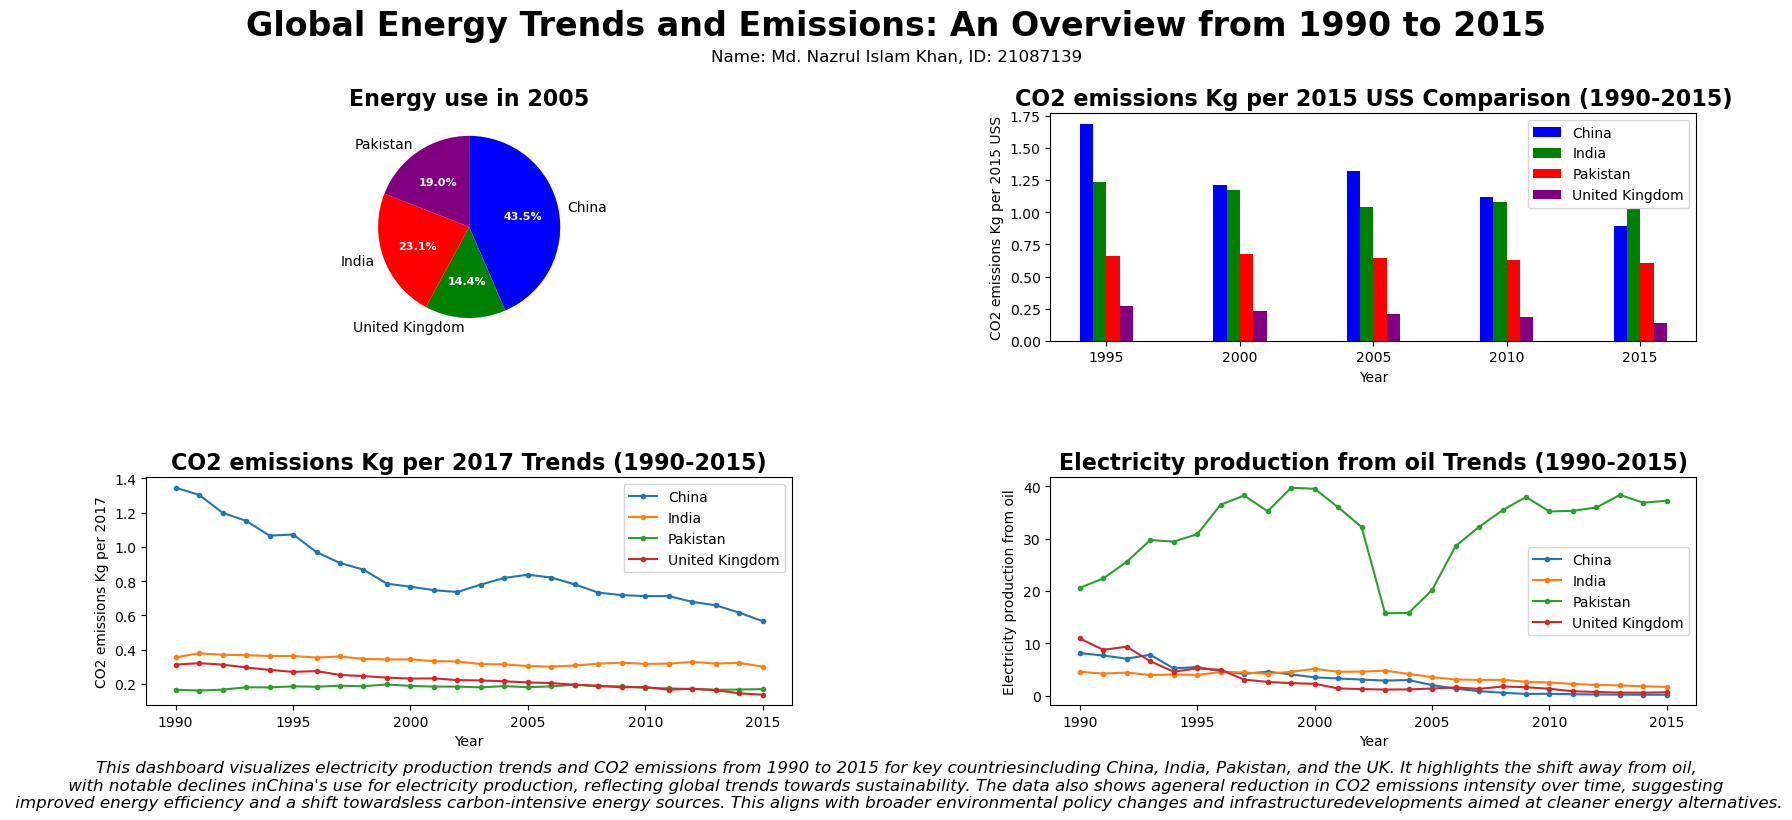

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def read_and_manipulate_data():
    """
    Reads data from a CSV file, performs data manipulations, and returns the processed DataFrame.
    Operations include dropping unused columns, renaming columns for clarity, and converting data types.
    """
    df = pd.read_csv('World_Climate data.csv', skiprows=4)
    # Remove unnecessary columns
    df.drop(columns=['Indicator Code', 'Country Code'], inplace=True)
    # Rename columns for easier understanding
    df.rename(columns={'Country Name': 'country', 'Indicator Name': 'series'}, inplace=True)
    # Convert year columns to numeric and rename for clarity
    for col in df.columns:
        if 'YR' in col:
            new_name = col.split('[')[0].strip()
            df.rename(columns={col: new_name}, inplace=True)
            df[new_name] = pd.to_numeric(df[new_name], errors='coerce')

    # Mapping original series names to more concise names
    all_indicators = {
        'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)': 'Energy use',
        'CO2 emissions (kg per 2015 US$ of GDP)': 'CO2 emissions Kg per 2015 USS',
        'CO2 emissions (kg per 2017 PPP $ of GDP)': 'CO2 emissions Kg per 2017',
        'Electricity production from oil sources (% of total)': 'Electricity production from oil'
    }
    df['series'] = df['series'].map(all_indicators)
    selected_indicators = list(all_indicators.values())
    df = df[df['series'].isin(selected_indicators)]
    return df

def plot_energy_pie_chart(ax, energy_data, energy_series):
    """
    Plots a pie chart illustrating the proportion of a specific type of energy production by selected countries in 2015.
    
    Parameters:
        ax : matplotlib axis object
            The axis on which to draw the pie chart.
        energy_data : DataFrame
            The dataset containing energy production data.
        energy_series : str
            The specific type of energy data to plot.
    """
    focus_countries = ['China', 'India', 'Pakistan', 'United Kingdom']
    filtered_data = energy_data[energy_data['series'] == energy_series]
    # Extract and sort data for the year 1995
    year_data = filtered_data[filtered_data['country'].isin(focus_countries)][['country', '2005']].set_index('country')
    year_data['2005'].fillna(0, inplace=True)  # Handling missing data by filling with 0
    slice_colors = ['blue', 'green', 'red', 'purple']  # Assign colors to each country slice
    
    # Plotting the pie chart with customizations
    wedges, texts, autotexts = ax.pie(year_data['2005'], labels=year_data.index, autopct='%1.1f%%', colors=slice_colors, startangle=90, counterclock=False)
    
    ax.set_title(f'{energy_series} in 2005', fontsize=16, fontweight='bold')
    plt.setp(autotexts, size=8, weight='bold', color='white')  # Setting properties for percentage labels



def plot_energy_type_comparison(ax, energy_data, energy_indicator, focus_years=[1995, 2000, 2005, 2010, 2015]):
    """
    Plots a vertical bar chart comparing data over specified years for a chosen energy type.
    
    Parameters:
        ax : matplotlib axis object
            The axis on which to draw the bar chart.
        energy_data : DataFrame
            The data containing energy information.
        energy_indicator : str
            The specific type of energy data to plot.
        focus_years : list of int, optional
            The years for which data should be plotted. Defaults to [1995, 2000, 2005, 2010, 2015].
    """
    focus_countries = ['China', 'India', 'Pakistan', 'United Kingdom']
    filtered_data = energy_data[energy_data['series'] == energy_indicator]
    filtered_data = filtered_data[filtered_data['country'].isin(focus_countries)][['country'] + [str(year) for year in focus_years]]
    bar_width = 0.1
    country_colors = ['blue', 'green', 'red', 'purple']  # Assigning specific colors to each country
    
    # Plot bars for each country across the focus years
    for index, country in enumerate(focus_countries):
        years = filtered_data.columns[1:]
        values = filtered_data[filtered_data['country'] == country].iloc[0, 1:]
        ax.bar([x + index * bar_width for x in range(len(years))], values, label=country, color=country_colors[index], width=bar_width)
    
    ax.set_xlabel('Year')
    ax.set_ylabel(energy_indicator)
    ax.set_title(f'{energy_indicator} Comparison (1990-2015)', fontsize=16, fontweight='bold')
    ax.legend()
    ax.set_xticks([x + (len(focus_countries) - 1) * bar_width / 2 for x in range(len(years))])
    ax.set_xticklabels(years)

def plot_energy_trends(ax, energy_data, energy_type):
    """
    Plots a line chart illustrating energy production trends over time for selected countries.
    
    Parameters:
        ax : matplotlib axis object
            The axis on which to draw the line chart.
        energy_data : DataFrame
            The data containing energy information.
        energy_type : str
            The type of energy data to plot, represented as a series in the DataFrame.
    """
    focus_countries = ['China', 'India', 'Pakistan', 'United Kingdom']
    filtered_data = energy_data[energy_data['series'] == energy_type]
    filtered_data = filtered_data[filtered_data['country'].isin(focus_countries)]
    year_columns = [str(year) for year in range(1990, 2016)]  # Define the range of years for the data

    # Iterate over each country to plot its data
    for country in focus_countries:
        country_data = filtered_data[filtered_data['country'] == country]
        if not country_data.empty:
            years_data = country_data.iloc[0][year_columns]
            ax.plot(year_columns, years_data, label=country, marker='o', markersize=3)
    
    ax.set_xlabel('Year')
    ax.set_ylabel(energy_type)
    ax.set_title(f'{energy_type} Trends (1990-2015)', fontsize=16, fontweight='bold')
    ax.legend()
    ax.set_xticks(year_columns[::5])  # Setting ticks every 5 years for clarity


# Read and prepare data
df = read_and_manipulate_data()
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 4], height_ratios=[1, 1])
plt.subplots_adjust(top=0.85)

# Set the main title and authorship text
fig.suptitle('Global Energy Trends and Emissions: An Overview from 1990 to 2015', fontsize=24, fontweight='bold')
fig.text(0.5, 0.92, "Name: Md. Nazrul Islam Khan, ID: 21087139", ha='center', va='center', fontsize=12)

# Plot each chart in the grid
ax1 = plt.subplot(gs[0])
plot_energy_pie_chart(ax1, df, 'Energy use')
ax2 = plt.subplot(gs[1])
plot_energy_type_comparison(ax2, df, 'CO2 emissions Kg per 2015 USS')
ax3 = plt.subplot(gs[2])
plot_energy_trends(ax3, df, 'CO2 emissions Kg per 2017')
ax4 = plt.subplot(gs[3])
plot_energy_trends(ax4, df, 'Electricity production from oil')

# Adjust spacing and add a summary text
plt.subplots_adjust(wspace=0.4, hspace=0.6)
summary_text = (
"This dashboard visualizes electricity production trends and CO2 emissions from 1990 to 2015 for key countries" 
"including China, India, Pakistan, and the UK. It highlights the shift away from oil,\n with notable declines in"  
"China's use for electricity production, reflecting global trends towards sustainability. The data also shows a" 
"general reduction in CO2 emissions intensity over time, suggesting \n improved energy efficiency and a shift towards" 
"less carbon-intensive energy sources. This aligns with broader environmental policy changes and infrastructure" 
"developments aimed at cleaner energy alternatives."
)
fig.text(0.5, 0.01, summary_text, ha='center', va='center', fontsize=12, style='italic')

# Save the plot to a file
plt.savefig('21087139.png', dpi=300, bbox_inches='tight')
